<a href="https://colab.research.google.com/github/tendai-codes/DeepLearning/blob/main/Linear%20Regression_Template%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [111]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

### Create device agnostic code

In [112]:
# Setup device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

Using Device: cpu


### Create data sample

In [134]:
# Create data using linear regression parameters (y = Bx + a)
weight = 0.6 #B
bias = 0.2   #a

#create range values
start = 0
end = 1
step = 0.02

#Create X (features) and y (labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #add dimesion to help with model building
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2120],
         [0.2240],
         [0.2360],
         [0.2480],
         [0.2600],
         [0.2720],
         [0.2840],
         [0.2960],
         [0.3080]]))

In [114]:
 len(X), len(y)

(50, 50)

### Split Training & Test set

In [135]:
# Create train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test
                                             )


(40, 40, 10, 10)

### Plot your dataset

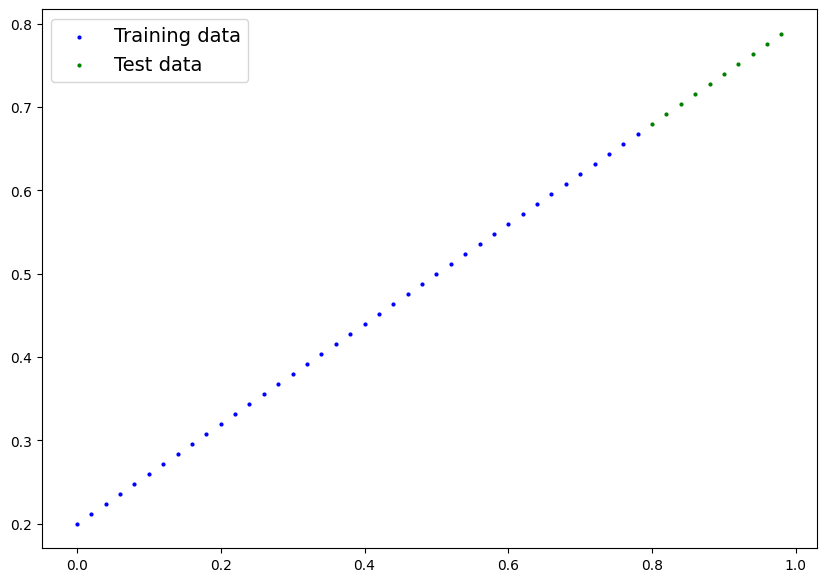

In [136]:
# Visualise dataset

def plot_predict(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predict=None):
  """
  Plot triaing data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #Plot traing data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label= "Training data")

  #Plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label= "Test data")

  #Are there predictions?
  if predict is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predict, c="r", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size":14});

plot_predict();

### Building Model (Linear regression model)








In [137]:
# Create linear regression model class > USE THIS!!
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    #Use nn.linear() for creating the model parameters > this is a method to automate creation of features

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    #in_features = no of input features, out_features = no of output features

# Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_a = LinearRegressionModel()
model_a, model_a.state_dict()


(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### Check model device vs target device

In [138]:
# Check model device
next(model_a.parameters()).device

device(type='cpu')

In [139]:
# Set model to target device
model_a.to(device)
next(model_a.parameters()).device

device(type='cpu')

### Training Model



#### Set up Loss Function & Optimiser

In [140]:
#Loss function
loss_fn = nn.L1Loss()

#Optimiser (stochastic gradient descent- SGD)
optimiser = torch.optim.SGD(params=model_a.parameters(),
                            lr=0.01) #lr = learning rate (hyperparameter) > the smaller the learning rate the smaller the change in the parameter

#### Build a training loop and a testing loop



In [141]:
# Add epoch (an epoch is 1 loop through the data) > hyperparameter
epochs = 200

# Make sure data is on correct target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Track different values - use these to track model performance & compare with other models
epoch_count = []
loss_values = []
test_loss_values = []

# Loop through data

### Training
# 0. Loop through the data
for epoch in range(epochs):

  #set model to training mode
  model_a.train()

  # 1. Forward pass
  y_pred = model_a(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimiser zero grad
  optimiser.zero_grad()

  # 4. Loss backward (Backpropagation)
  loss.backward()

  # 5. Optimiser step (Gradient descent)
  optimiser.step()


### Testing

  model_a.eval()
  with torch.inference_mode(): # turns off gradient tracking

    # 1. Forward pass
    test_pred = model_a(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:

    print(f"Epoch: {epoch} | Loss:{loss} | Test loss:{test_loss}")


Epoch: 0 | Loss:0.6941779851913452 | Test loss:0.7629762291908264
Epoch: 10 | Loss:0.5789680480957031 | Test loss:0.6282663941383362
Epoch: 20 | Loss:0.4637581706047058 | Test loss:0.49355649948120117
Epoch: 30 | Loss:0.3485483229160309 | Test loss:0.3588467240333557
Epoch: 40 | Loss:0.23333843052387238 | Test loss:0.22413687407970428
Epoch: 50 | Loss:0.11812856048345566 | Test loss:0.08942705392837524
Epoch: 60 | Loss:0.01466408371925354 | Test loss:0.027661234140396118
Epoch: 70 | Loss:0.01041039265692234 | Test loss:0.0235457606613636
Epoch: 80 | Loss:0.006971584167331457 | Test loss:0.01527326088398695
Epoch: 90 | Loss:0.0035398390609771013 | Test loss:0.007687687873840332
Epoch: 100 | Loss:0.0036876772064715624 | Test loss:0.012758761644363403
Epoch: 110 | Loss:0.0036876772064715624 | Test loss:0.012758761644363403
Epoch: 120 | Loss:0.0036876772064715624 | Test loss:0.012758761644363403
Epoch: 130 | Loss:0.0036876772064715624 | Test loss:0.012758761644363403
Epoch: 140 | Loss:0.00

### Evaluate Model


In [142]:
model_a.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5940]])),
             ('linear_layer.bias', tensor([0.2060]))])

In [143]:
# Turn model into Evaluation mode
model_a.eval()


# Make Predictions on test data
with torch.inference_mode():
  y_preds = model_a(X_test)

y_preds

tensor([[0.6812],
        [0.6931],
        [0.7050],
        [0.7169],
        [0.7288],
        [0.7407],
        [0.7525],
        [0.7644],
        [0.7763],
        [0.7882]])

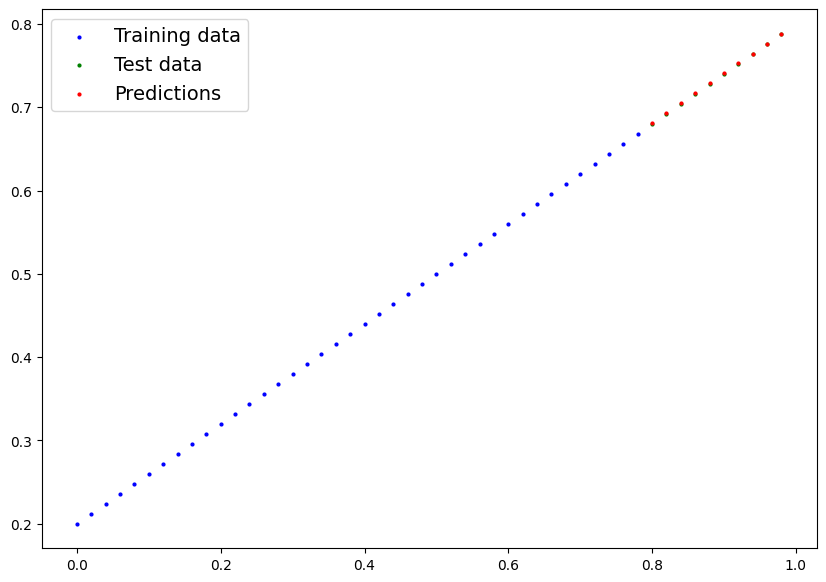

In [144]:
#Check model visually - if predictions are happening on GPU adjust to CPU by eg y_preds_new.cpu()
plot_predict(predict=y_preds)

### Saving a model in Pytorch


In [145]:
# Saving PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "PyTorch Workflow template.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_a.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/PyTorch Workflow template.pth


In [146]:
model_a.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5940]])),
             ('linear_layer.bias', tensor([0.2060]))])

### Loading a model in Pytorch


In [148]:
# Load PyTorch model (saved state_dict())

# Create ne instance of linear regresssion model
loaded_model_a = LinearRegressionModel()

# Load saved state_dict of model_a to new instance
loaded_model_a.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_a.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

### Evaluate loaded model


In [152]:
next(loaded_model_a.parameters()).device

device(type='cpu')

In [153]:
loaded_model_a.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5940]])),
             ('linear_layer.bias', tensor([0.2060]))])

In [158]:
# Test loaded model by comparing with original model

loaded_model_a.eval()

with torch.inference_mode():
  loaded_model_a_preds = loaded_model_a(X_test)

# Compare models

y_preds == loaded_model_a_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])